The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


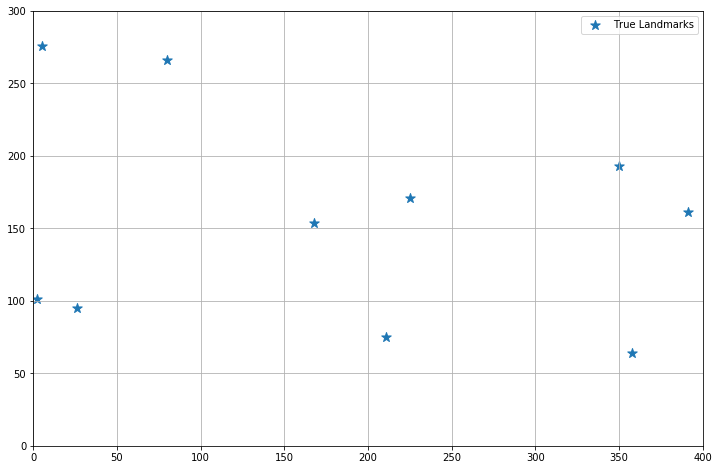

In [3]:
from data_utility.environment import *
from data_utility.utility import *
from slam_algorithms.robot import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

plt.ion()
plt.rcParams['figure.figsize'] = (12.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

env = Environment(n_landmarks=10)
fig, ax = env.plot_env()

robot's initial guess of landmark: {0: [189, 42], 1: [73, 262], 2: [31, 161], 3: [386, 183], 4: [277, 8], 5: [326, 231], 6: [88, 228], 7: [373, 188], 8: [184, 219], 9: [74, 211]}
environment's landmark {0: [358, 64], 1: [350, 193], 2: [391, 161], 3: [26, 95], 4: [225, 171], 5: [80, 266], 6: [2, 101], 7: [211, 75], 8: [168, 154], 9: [5, 276]}
---
prior state:[148.76983947 102.04010275]
post state:[147.54549929 100.80760712]
---
prior state:[147.54549929 100.80760712]
post state:[119.8135791   99.19590842]
---
prior state:[119.8135791   99.19590842]
post state:[112.09598219  99.21930069]
---
prior state:[112.09598219  99.21930069]
post state:[109.02730251  99.02981798]
---
prior state:[109.02730251  99.02981798]
post state:[107.17103522  99.32255594]
---
prior state:[107.17103522  99.32255594]
post state:[106.26979942  99.36630622]
---
prior state:[106.26979942  99.36630622]
post state:[105.57957272  99.38581457]
---
prior state:[105.57957272  99.38581457]
post state:[104.85335106  99.74

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a19065240>)

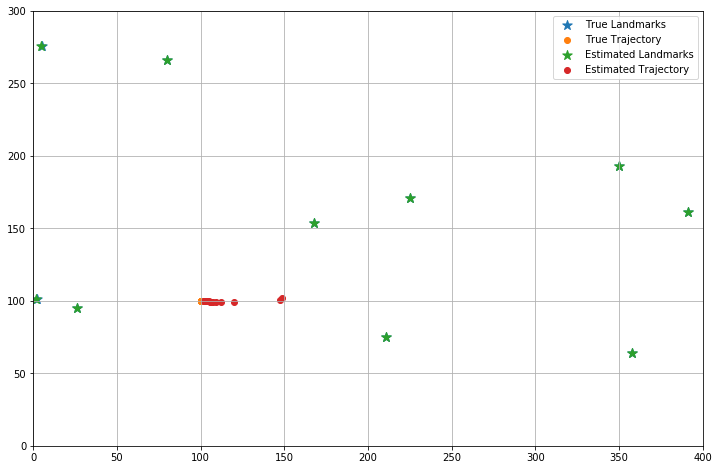

In [4]:
# Check Environment and robot's position

Q = np.array([[15., 0],[0, 15.]])
R = np.array([[10., 0],[0, 10.]])
P = np.identity(2)*5
s = np.array([100., 100.])
rob = MyRobot(env=env, Q=Q, R=R, s0=s, P0=P)
print("robot's initial guess of landmark: {}".format(rob.landmarks))
print("environment's landmark {}".format(rob.env.landmarks))
print("---")

ob = rob.observation_update(s=s)
s_prior = s + 50*np.random.randn(2)
for _ in range(20):
    s_true, s_prior = rob.time_update(s=s_prior, u=None)
    s_post = rob.map_construction(s=s_prior, ob=ob)
    ob = rob.observation_update(s=s_post)
    s_prior = s_post
    print("---")
rob.visualize()


